# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [93]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create a new dataframe from your CSV
clothing_df=pd.read_csv("C:/Users/Buddi/Documents/GitHub/cleaning-data/Womens Clothing E-Commerce Reviews.csv")

In [94]:
# Print out any information you need to understand your dataframe
clothing_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [95]:
clothing_df.count()

Unnamed: 0                 23486
Clothing ID                23486
Age                        23486
Title                      19676
Review Text                22641
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
Division Name              23472
Department Name            23472
Class Name                 23472
dtype: int64

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

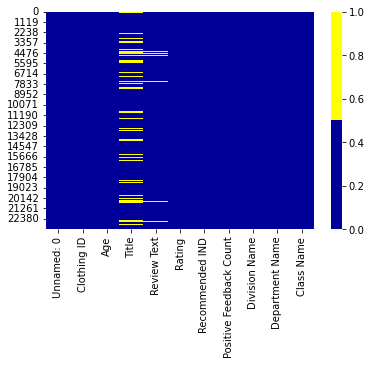

In [96]:
# Plot a heatmap of any missing data
cols = clothing_df.columns[:30]
colours = ['#000099', '#ffff00'] 
sns.heatmap(clothing_df[cols].isnull(), cmap=sns.color_palette(colours))


In [97]:
# Try out a missing data percentage list! 
for col in clothing_df.columns:
    pct_missing = np.mean(clothing_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

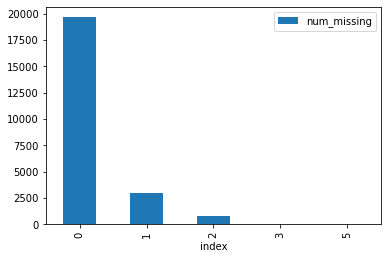

In [98]:
# Plot a missing data histogram
for col in clothing_df.columns:
    missing = clothing_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        clothing_df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in clothing_df.columns if 'ismissing' in col]
clothing_df['num_missing'] = clothing_df[ismissing_cols].sum(axis=1)

clothing_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')



Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

I think "missing data percentage list" technique is more effective since it has more readability and easy to implement the logic when compared to other two techniques since it is a small dataset.

In [99]:
# Handle any missing data in your dataframe.
#top = clothing_df['Title'].describe()['top']
clothing_df['Title'] = clothing_df['Title'].fillna('MISSING')
clothing_df['Division Name'] = clothing_df['Division Name'].fillna('MISSING')
clothing_df['Department Name'] = clothing_df['Department Name'].fillna('MISSING')
clothing_df['Class Name'] = clothing_df['Class Name'].fillna('MISSING')

In [100]:
top = clothing_df['Review Text'].describe()['top']
clothing_df['Review Text'] = clothing_df['Review Text'].fillna(top)

In [101]:
clothing_df.count()

Unnamed: 0                   23486
Clothing ID                  23486
Age                          23486
Title                        23486
Review Text                  23486
Rating                       23486
Recommended IND              23486
Positive Feedback Count      23486
Division Name                23486
Department Name              23486
Class Name                   23486
Title_ismissing              23486
Review Text_ismissing        23486
Division Name_ismissing      23486
Department Name_ismissing    23486
Class Name_ismissing         23486
num_missing                  23486
dtype: int64

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

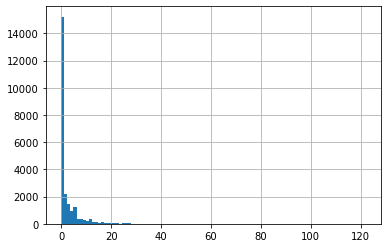

In [102]:
# Plot a histogram to see if there are any outliers.
clothing_df["Positive Feedback Count"].hist(bins=100)

In [68]:
# Use the describe() method
# clothing_df["Age"].describe()


count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [103]:
clothing_df["Positive Feedback Count"].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<AxesSubplot:>

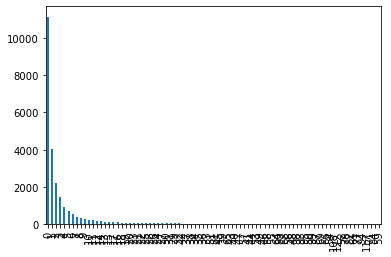

In [104]:
# Plot a bar chart
clothing_df['Positive Feedback Count'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

Using the describe() technique helped me to detect and understand the outliers.For example, for the feature Age, we can see that the maximum value is 122, while the 75% quartile is 3. The 122 value is an outlier.

I have deleted the data of 'Positive Feedback Count' > 3 from dataframe.


In [105]:
# Handle any outliers in your dataframe
clothing_df=clothing_df[clothing_df['Positive Feedback Count']>3]

In [106]:
clothing_df.count()

Unnamed: 0                   4641
Clothing ID                  4641
Age                          4641
Title                        4641
Review Text                  4641
Rating                       4641
Recommended IND              4641
Positive Feedback Count      4641
Division Name                4641
Department Name              4641
Class Name                   4641
Title_ismissing              4641
Review Text_ismissing        4641
Division Name_ismissing      4641
Department Name_ismissing    4641
Class Name_ismissing         4641
num_missing                  4641
dtype: int64

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [118]:
# Look for any irrelevant data in the dataframe. How will you handle it?
clothing_df.drop('Age',axis=1, inplace=True)
clothing_df.head()
# I find that 'Age' feature in dataset is irrelevant and hence handled it by dropping the column.

,Unnamed: 0,Clothing ID,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
1,1,1080,MISSING,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
4,4,847,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0
5,5,1080,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,False,False,False,False,False,0
7,7,858,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,False,False,False,False,False,0
10,10,1077,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,False,False,False,False,False,0


In [120]:
# Look for duplicates. How will you handle any duplicates?
clothing_df.duplicated().sum()
# the dataset doesn't have any Duplicate data

0

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# one feature is uninformative if it has too many rows having same value.
# We need to understand the reasons behind the repetitive feature. When they are genuinely uninformative, we can drop the records.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [84]:
# Try to convert all the strings in a column to lower or upper case. 
clothing_df['Department Name'] =clothing_df['Department Name'].str.upper()

In [85]:
clothing_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,DRESSES,Dresses,False,False,False,False,False,0
10,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,DRESSES,Dresses,False,False,False,False,False,0
12,12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,DRESSES,Dresses,False,False,False,False,False,0
21,21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,1,14,General,DRESSES,Dresses,False,False,False,False,False,0
24,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,1,0,General,TOPS,Blouses,False,False,False,False,False,0
